In [1]:
## import Matpolt with PyQt4 Backend
import matplotlib
matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
'''
A linear regression learning algorithm example using TensorFlow library.
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''

import tensorflow as tf
import numpy as np

In [3]:
# Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 50

In [4]:
# Training Data
train_X = np.asarray([3.3, 4.4, 5.5, 6.71 ,6.93,
                         4.168, 9.779, 6.182, 7.59, 2.167,
                         7.042, 10.791, 5.313, 7.997, 5.654,
                         9.27, 3.1, 12.21, 6.12, 8.24])
train_Y = np.asarray([1.7, 2.76, 2.09, 3.19, 1.694,
                         1.573, 3.366, 2.596, 2.53, 1.221,
                         2.827, 3.465, 1.65, 2.904, 2.42,
                         2.94, 1.3, 3.2, 1.6, 1.8])
n_samples = train_X.shape[0]

print(train_X.shape)
print(train_Y.shape)

(20,)
(20,)


In [5]:
# tf Grapth Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [6]:
# Create Model
## Set Model Weights
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

In [7]:
# Construct a Linear model
activation = tf.add(tf.mul(X, W), b)

In [8]:
# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(activation - Y, 2)) / (2*n_samples) #L2 Loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient Descent

In [9]:
# Initializing the variables
init = tf.initialize_all_variables()

Epoch: 0001 cost= 3.562679291 W= 0.0111058 b= -0.310985
Epoch: 0051 cost= 0.189549938 W= 0.351683 b= -0.188575
Epoch: 0101 cost= 0.179542094 W= 0.342575 b= -0.117865
Epoch: 0151 cost= 0.170743316 W= 0.334034 b= -0.0515453
Epoch: 0201 cost= 0.163007915 W= 0.326022 b= 0.010657
Epoch: 0251 cost= 0.156207606 W= 0.318508 b= 0.0689973
Epoch: 0301 cost= 0.150229588 W= 0.311461 b= 0.123715
Epoch: 0351 cost= 0.144974679 W= 0.304851 b= 0.175036
Epoch: 0401 cost= 0.140355736 W= 0.298651 b= 0.22317
Epoch: 0451 cost= 0.136295855 W= 0.292836 b= 0.268316
Epoch: 0501 cost= 0.132727608 W= 0.287383 b= 0.310659
Epoch: 0551 cost= 0.129591718 W= 0.282268 b= 0.350373
Epoch: 0601 cost= 0.126835912 W= 0.27747 b= 0.387621
Epoch: 0651 cost= 0.124414325 W= 0.272971 b= 0.422556
Epoch: 0701 cost= 0.122286558 W= 0.268751 b= 0.455322
Epoch: 0751 cost= 0.120417081 W= 0.264793 b= 0.486054
Epoch: 0801 cost= 0.118774652 W= 0.26108 b= 0.514879
Epoch: 0851 cost= 0.117331885 W= 0.257598 b= 0.541914
Epoch: 0901 cost= 0.1160

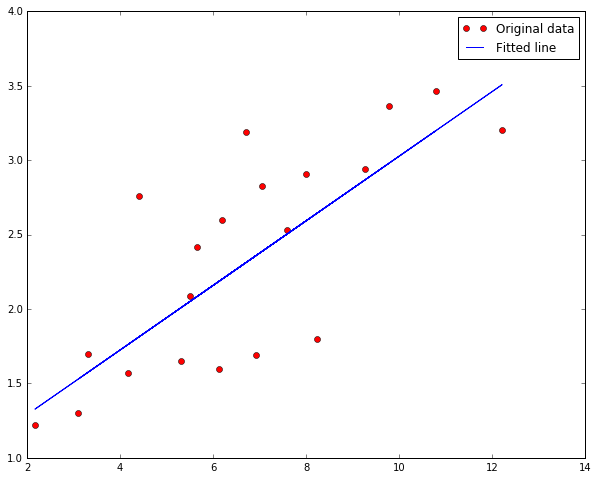

In [10]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
        #Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
            "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, Y:train_Y})), \
            "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    print("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), "W=", sess.run(W), "b=", sess.run(b))

    #Graphic display
    pred_Y = sess.run(W) * train_X + sess.run(b)
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, pred_Y, label='Fitted line')
    plt.legend()
    plt.show()